

# Digital Image Processing - 3

---
Shivani S. Patil








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Date: 11/03/2025

---
##Implementation - 1


###1.Read an Image as input and pass it through the Gaussian Low pass filter of matrix 3x3,5x5,7x7

####Requirements:

In [ ]:
!pip install opencv-python matplotlib


###Gaussian LPF

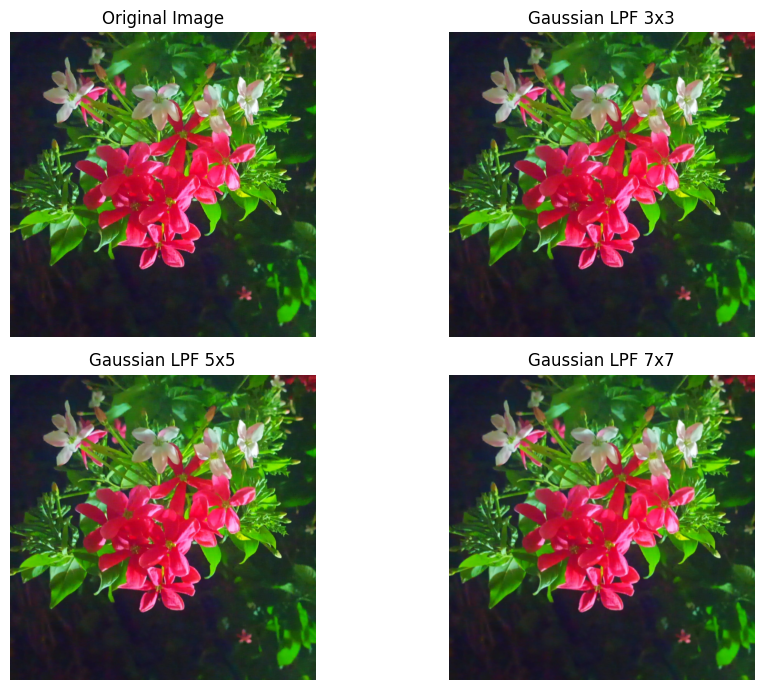

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_lpf(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Read the image
image = cv2.imread('/content/drive/MyDrive/WhatsApp Image 2025-03-05 at 11.18.34 PM.jpeg')  # Change the path if required
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color format

# Apply Gaussian LPF with different kernel sizes
lpf_3x3 = apply_gaussian_lpf(image, 3)
lpf_5x5 = apply_gaussian_lpf(image, 5)
lpf_7x7 = apply_gaussian_lpf(image, 7)


# Display original and filtered images
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lpf_3x3)
plt.title('Gaussian LPF 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(lpf_5x5)
plt.title('Gaussian LPF 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(lpf_7x7)
plt.title('Gaussian LPF 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()


###Gaussian HPF

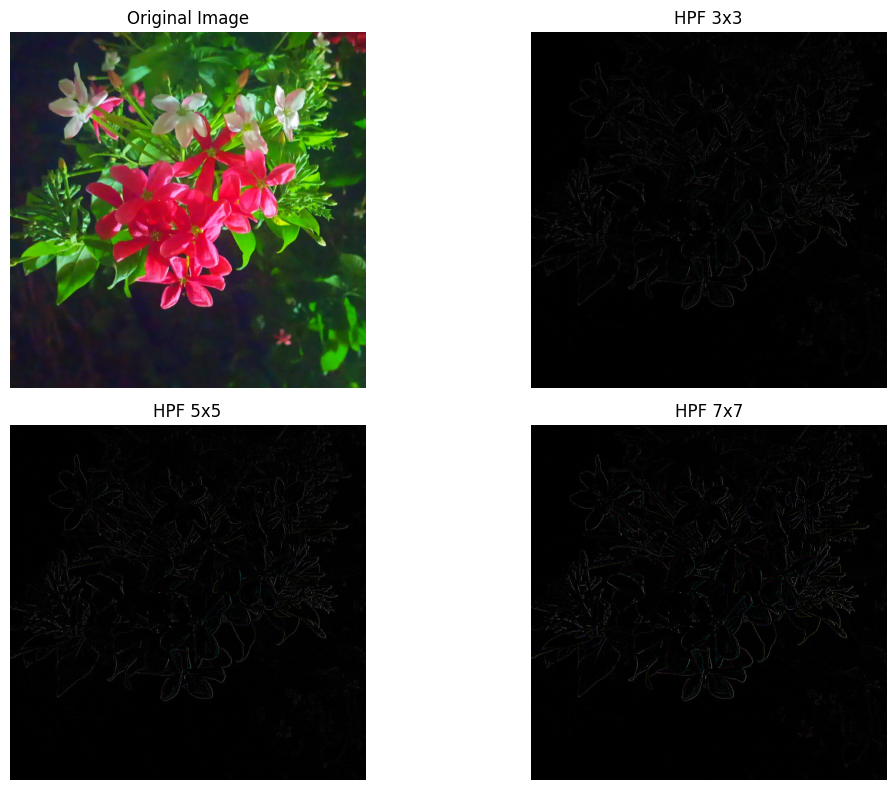

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_highpass_filter(image, kernel_size):
    # Create a Gaussian filter (low pass)
    gaussian_filter = cv2.getGaussianKernel(kernel_size, 0)
    gaussian_filter = gaussian_filter * gaussian_filter.T

    # Convert Gaussian filter to High Pass Filter
    highpass_filter = -gaussian_filter
    highpass_filter[kernel_size // 2, kernel_size // 2] += 1

    # Apply HPF and Normalize for Visibility
    filtered_image = cv2.filter2D(image, -1, highpass_filter)

    # Normalize for better visualization
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return filtered_image

# Read the image
image = cv2.imread('/content/drive/MyDrive/WhatsApp Image 2025-03-05 at 11.18.34 PM.jpeg')  # Replace with your file path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian HPF with different kernel sizes
hpf_3x3 = gaussian_highpass_filter(image, 3)
hpf_5x5 = gaussian_highpass_filter(image, 5)
hpf_7x7 = gaussian_highpass_filter(image, 7)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hpf_3x3, cmap='gray')
plt.title('HPF 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(hpf_5x5, cmap='gray')
plt.title('HPF 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hpf_7x7, cmap='gray')
plt.title('HPF 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()


##2.Read an image ,produce  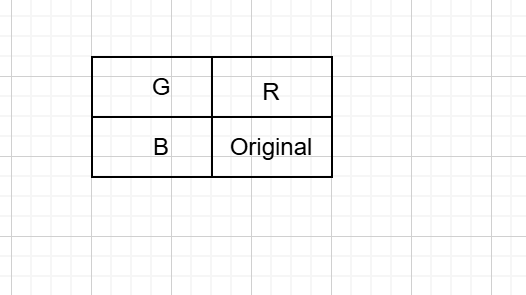

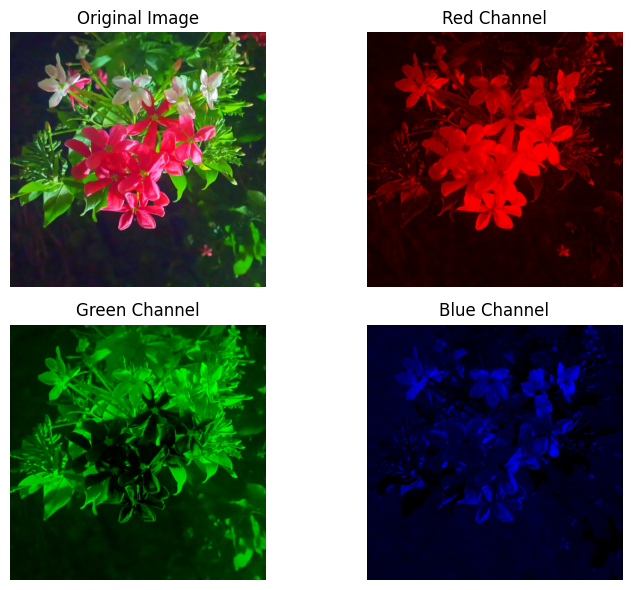

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_highpass_filter(image, kernel_size):
    # Create a Gaussian filter (low pass)
    gaussian_filter = cv2.getGaussianKernel(kernel_size, 0)
    gaussian_filter = gaussian_filter * gaussian_filter.T

    # Convert Gaussian filter to High Pass Filter
    highpass_filter = -gaussian_filter
    highpass_filter[kernel_size // 2, kernel_size // 2] += 1

    # Apply HPF and Normalize for Visibility
    filtered_image = cv2.filter2D(image, -1, highpass_filter)
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return filtered_image

# Read the image
# Replace 'image.jpg' with the correct path to your image file
image = cv2.imread('/content/drive/MyDrive/WhatsApp Image 2025-03-05 at 11.18.34 PM.jpeg')  # Replace with your file path

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract color channels
    R = image.copy()
    R[:, :, 1] = 0  # Zero out G channel
    R[:, :, 2] = 0  # Zero out B channel

    G = image.copy()
    G[:, :, 0] = 0  # Zero out R channel
    G[:, :, 2] = 0  # Zero out B channel

    B = image.copy()
    B[:, :, 0] = 0  # Zero out R channel
    B[:, :, 1] = 0  # Zero out G channel

    # Display the results
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(R)
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(G)
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(B)
    plt.title('Blue Channel')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

##Date : 13/03/2025  

---
##Implementation -2


####1. Read an image and increase its intensity by some scaling factor and  make it bright and dark.

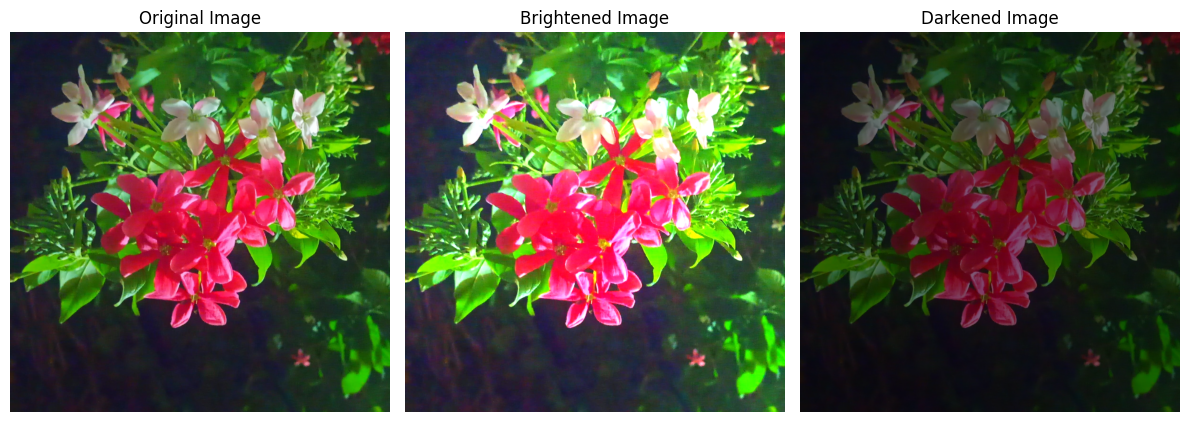

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/drive/MyDrive/WhatsApp Image 2025-03-05 at 11.18.34 PM.jpeg')  # Replace with your file path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to adjust intensity
def adjust_intensity(image, scale):
    # Ensure pixel values remain within valid range
    adjusted = np.clip(image * scale, 0, 255).astype(np.uint8)
    return adjusted

# Scale factors
bright_image = adjust_intensity(image, 1.5)  # Increase intensity
dark_image = adjust_intensity(image, 0.5)     # Decrease intensity

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_image)
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dark_image)
plt.title('Darkened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


####2.Read two images and perform addition,subtraction ,multiplication and division operations on that.

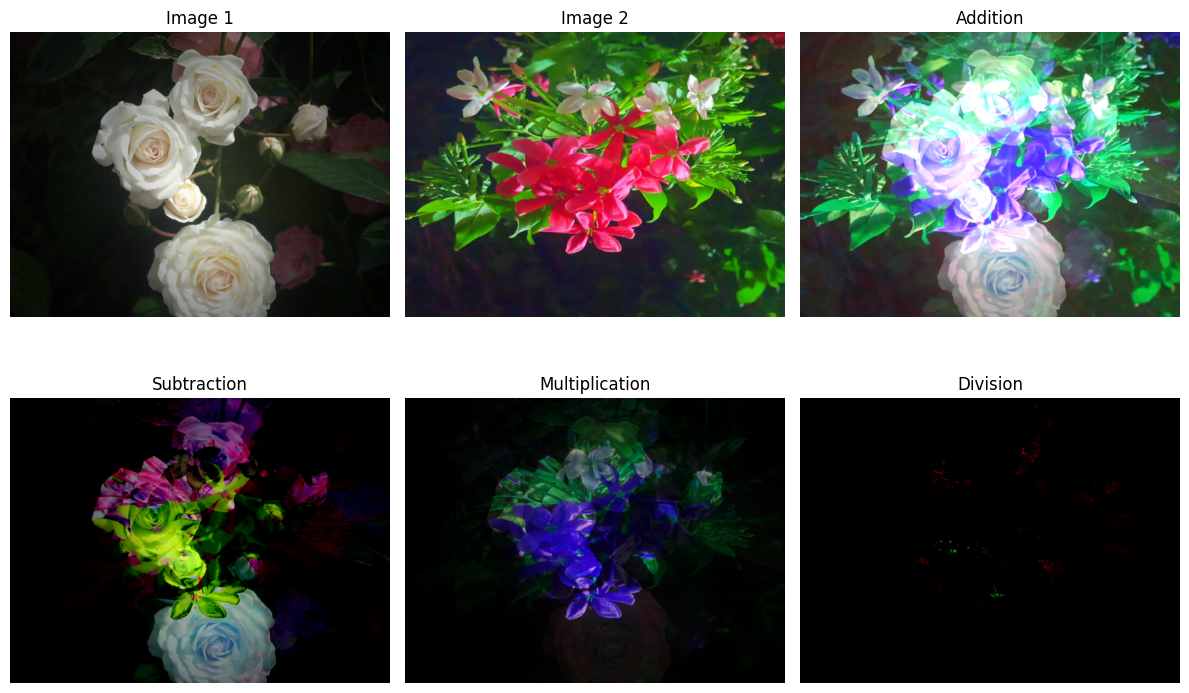

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the images
image1 = cv2.imread('/content/drive/MyDrive/JPG/DSC00941.JPG')  # Replace with your image path
image2 = cv2.imread('/content/drive/MyDrive/JPG/WhatsApp Image 2025-03-05 at 11.18.34 PM.jpeg')  # Replace with your image path

# Resize image2 to match image1 dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Convert images to RGB for visualization
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Arithmetic Operations
addition = cv2.add(image1, image2)
subtraction = cv2.subtract(image1, image2)

# Improved Multiplication and Division
multiplication = cv2.multiply(image1.astype(np.float32), image2.astype(np.float32))
multiplication = cv2.normalize(multiplication, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

division = cv2.divide(image1.astype(np.float32), image2.astype(np.float32) + 1e-5)  # Avoid division by zero
division = cv2.normalize(division, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image1_rgb)
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image2_rgb)
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(addition)
plt.title('Addition')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(subtraction)
plt.title('Subtraction')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(multiplication)
plt.title('Multiplication')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(division)
plt.title('Division')
plt.axis('off')

plt.tight_layout()
plt.show()
